In [1]:
import numpy as np
# from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# (b)

### Training Set

(540, 2500) (540,)


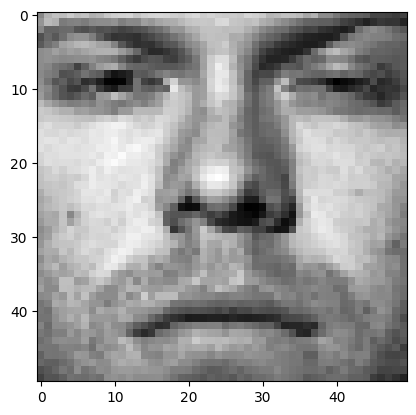

In [2]:
train_labels, train_data = [], []
for line in open('faces/train.txt'):
    im = plt.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

### Test Set

(100, 2500) (100,)


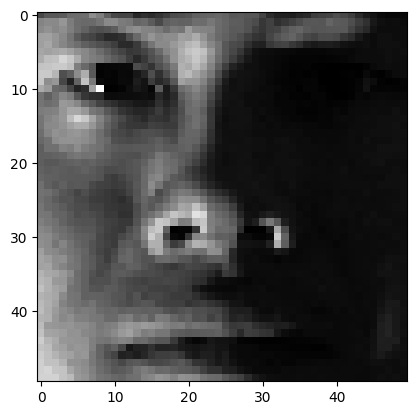

In [3]:
test_labels, test_data = [], []
for line in open('faces/test.txt'):
    im = plt.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

# (c)

### Average Face

Average face can be computed by summing up all the images in rows in X and then divide them by the number of images.

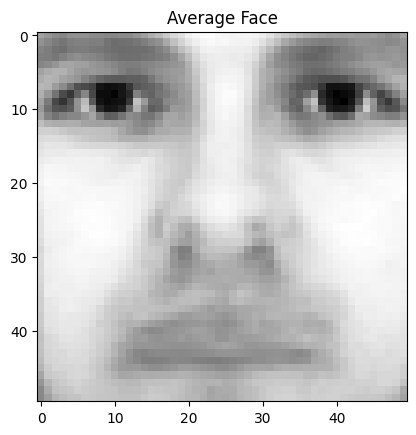

In [4]:
# Compute the average face
average_face = np.mean(train_data, axis=0)

# Display the average face
plt.imshow(average_face.reshape(50, 50), cmap=cm.Greys_r)
plt.title("Average Face")
plt.show()

# (d)

### Training Set Mean Subtraction

Training set mean subtraction can be computed by substracting the average face on question (c) from every face in both the training and test sets.

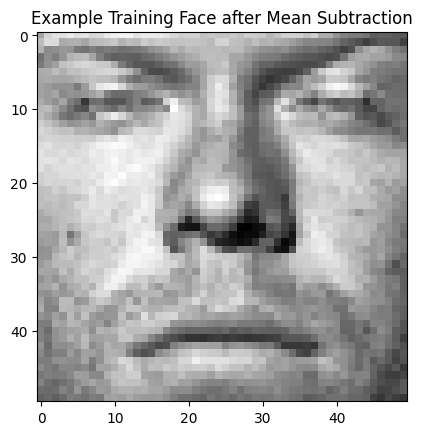

In [5]:
# Subtract the average face from each face in the training set
train_data -= average_face

# Display an example face image after mean subtraction
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Example Training Face after Mean Subtraction")
plt.show()

### Test Set Mean Subtraction

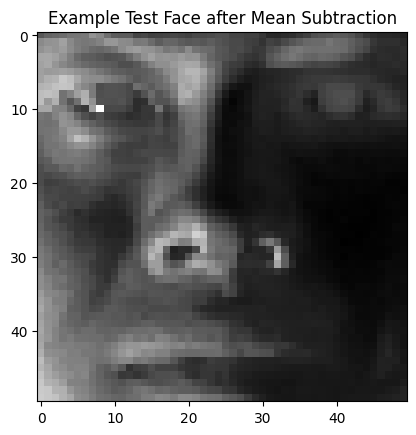

In [6]:
# Subtract the average face from each face in the test set
test_data -= average_face

# Display an example face image from the test set after mean subtraction
plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title("Example Test Face after Mean Subtraction")
plt.show()

# (e) 

### Eigenface

To obtain eigenfaces, we have to perform an eigendecomposition

- Compute the eigendecomposition of $X^TX$
- Extract the eigenvectors
- Display the first 10 eigenfaces

In [7]:
from numpy.linalg import eigh

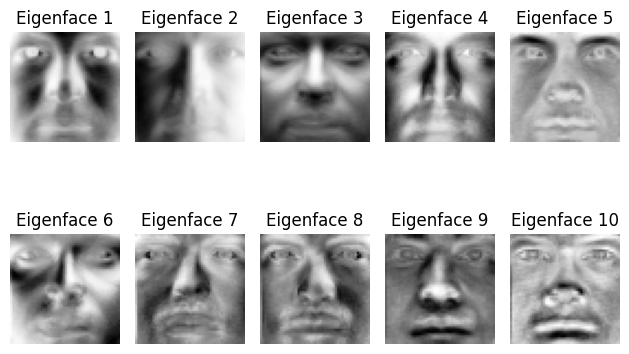

In [8]:
# Compute the covariance matrix
cov_matrix = np.dot(train_data.T, train_data)

# Perform eigendecomposition
eigenvalues, eigenvectors = eigh(cov_matrix)

# Sort the eigenvectors in descending order of their eigenvalue
idx = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, idx]

# Display the first 10 eigenfaces
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenvectors[:, i].reshape(50, 50), cmap=cm.Greys_r)
    plt.title(f"Eigenface {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# (f)

### Eigenface Feature

Here is the function to generate the feature matrices for both training and test sets using the top r eigenfaces.

In [9]:
def generate_feature_matrix(data, eigenvectors, r):
    top_eigenvectors = eigenvectors[:, :r].T
    return np.dot(data, top_eigenvectors.T)

r = 10  # Number of top eigenfaces to use
F = generate_feature_matrix(train_data, eigenvectors, r)
Ftest = generate_feature_matrix(test_data, eigenvectors, r)

# (g)

### Face Recognition.

With logistic regression, face recognition can be computed as follows:
- Use train_data(F) and test_data(Ftest) for training and testing.
- Train a Logistic Regression model, and test
- Report classification accuracy and plot it as a function of r.

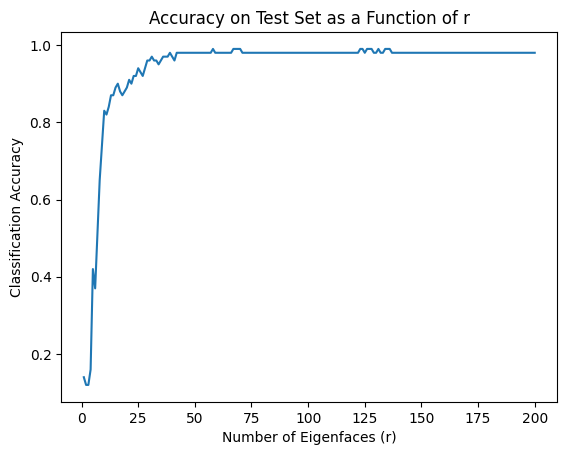

0.98

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracies = []
for r in range(1, 201):  # Iterate over different values of r
    F = generate_feature_matrix(train_data, eigenvectors, r)
    Ftest = generate_feature_matrix(test_data, eigenvectors, r)

    # Train logistic regression model
    model = LogisticRegression(multi_class='ovr', max_iter=1000)
    model.fit(F, train_labels)

    # Test the model
    predictions = model.predict(Ftest)
    accuracy = accuracy_score(test_labels, predictions)
    accuracies.append(accuracy)

# Plotting the accuracies
plt.plot(range(1, 201), accuracies)
plt.xlabel('Number of Eigenfaces (r)')
plt.ylabel('Classification Accuracy')
plt.title('Accuracy on Test Set as a Function of r')
plt.show()

accuracy